In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from learning_analysis import learning_analysis
from bias_variance_analysis import bias_variance_analysis
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.model_selection import GridSearchCV

In [3]:
# Read the preprocessed dataset
df = pd.read_csv('../dataset/body_level_classification_train_preprocessed.csv')

X = df.drop('Body_Level', axis=1)
y = df['Body_Level']

In [21]:
# Split the data into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15)

In [22]:
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [1, 0.1, 0.01, 0.001], 
              'kernel': ['linear', 'poly' ,  'rbf'],
              'degree': [1, 2, 3, 4, 5 , 6, 7 , 8 , 9 , 10]}

grid = GridSearchCV(SVC(), param_grid,cv=5)
grid.fit(X_train, y_train)

# print the best parameters found
print("Best parameters: ", grid.best_params_)

# evaluate the performance of the model with the best parameters on the test set
best_svm = grid.best_estimator_
test_score = best_svm.score(X_test, y_test)
print("Test accuracy with best parameters: {:.2f}".format(test_score))

Best parameters:  {'C': 100, 'degree': 1, 'gamma': 1, 'kernel': 'linear'}
Test accuracy with best parameters: 0.99


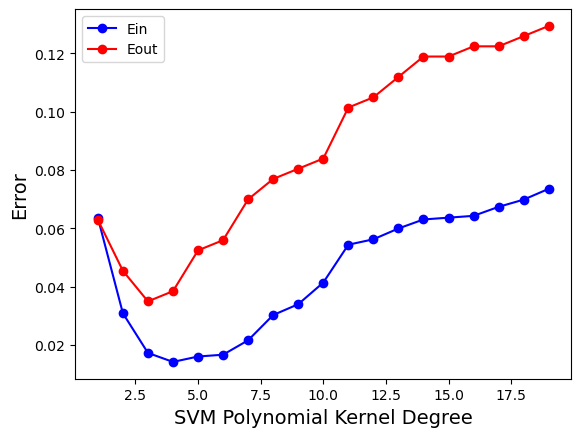

In [23]:
values = [i for i in range(1, 20)]
train_scores = []
val_scores = []
# evaluate a decision tree for each depth
for i in values:
    # configure the model
    model = SVC(kernel='poly', degree=i)
    # fit model on the training dataset
    model.fit(X_train, y_train)
    # evaluate on the train dataset
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)
    # evaluate on the validation dataset
    val_yhat = model.predict(X_val)
    val_acc = accuracy_score(y_val, val_yhat)
    val_scores.append(val_acc)
    
train_loss = [1 - i for i in train_scores]
val_loss = [1 - i for i in val_scores]

# plot of train and validation scores vs tree depth
plt.style.use('default')
plt.plot(values, train_loss, 'co-', color='b', label='Ein')
plt.plot(values, val_loss, 'co-', color='r', label='Eout')
plt.ylabel('Error', fontsize = 14)
plt.xlabel('SVM Polynomial Kernel Degree', fontsize = 14)
plt.legend()
plt.show()

In [24]:
# Fit the SVM model
model_architecture = SVC(kernel='linear', degree=1 , gamma=1, C=100)

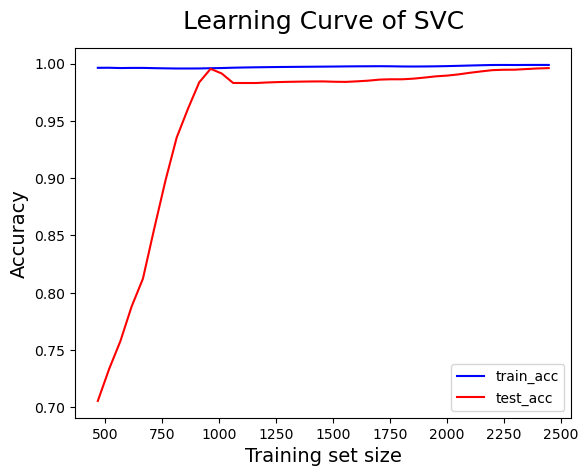

In [25]:
learning_analysis(model_architecture, X, y)

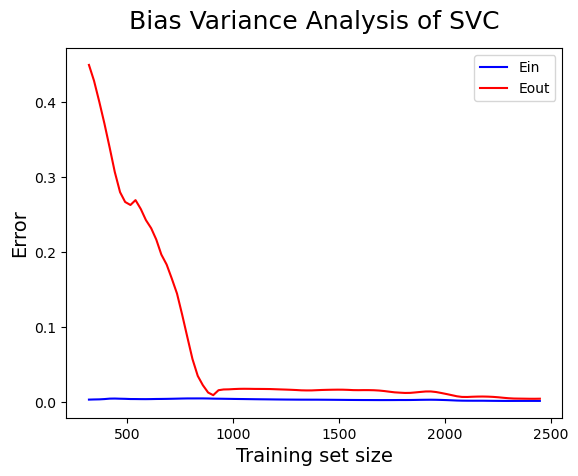

In [26]:
bias_variance_analysis(model_architecture, X, y)

In [27]:
# Fit the model
model = model_architecture.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
auc_roc = roc_auc_score(pd.get_dummies(y_test), pd.get_dummies(y_pred), average='weighted', multi_class='ovr')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('AUC-ROC:', auc_roc)

Accuracy: 0.9938725490196079
Precision: 0.993902077884454
Recall: 0.9938725490196079
F1-score: 0.9938783945552977
AUC-ROC: 0.9958973888054622


In [28]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      0.99      1.00       205
           2       0.99      0.99      0.99       203
           3       0.99      1.00      0.99       212
           4       1.00      1.00      1.00       196

    accuracy                           0.99       816
   macro avg       0.99      0.99      0.99       816
weighted avg       0.99      0.99      0.99       816

